In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

data = pd.read_csv("twitter_clean_data.csv")

/Users/pgalli/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sia = SentimentIntensityAnalyzer()
''' This function takes in text data and returns
the compound polarity score rounded to 3 decimal places.'''
def vader_sentiment(text):
    return round(sia.polarity_scores(str(text))["compound"], 3)

In [3]:
data["polarity"] = data["clean_post"].apply(vader_sentiment)

In [4]:
data.head(5)

,clean_post,polarity
0,years since diagnosed anxiety depression today...,-0.660
1,sunday need break im planning spend little tim...,0.000
2,awake tired need sleep brain ideas,-0.440
3,rt retro bears make perfect gifts great beginn...,0.904
4,hard say whether packing lists making life eas...,0.178


In [5]:
def sentiment_level(score):
    '''This function classifies each post as negative,
    postive, or neutral based on the threshold -0.05 and 0.05'''
    if score < -0.05:
        return "Negative"
    elif score > 0.05:
        return "Positve"
    else:
        return "Neutral"

In [6]:
data["sentiment"] = data['polarity'].apply(sentiment_level)

In [7]:
data.head(5)

,clean_post,polarity,sentiment
0,years since diagnosed anxiety depression today...,-0.660,Negative
1,sunday need break im planning spend little tim...,0.000,Neutral
2,awake tired need sleep brain ideas,-0.440,Negative
3,rt retro bears make perfect gifts great beginn...,0.904,Positve
4,hard say whether packing lists making life eas...,0.178,Positve


In [8]:
data['sentiment'].value_counts()

sentiment
Positve     7581
Neutral     7013
Negative    5406
Name: count, dtype: int64

Text(0, 0.5, 'Sentiment')

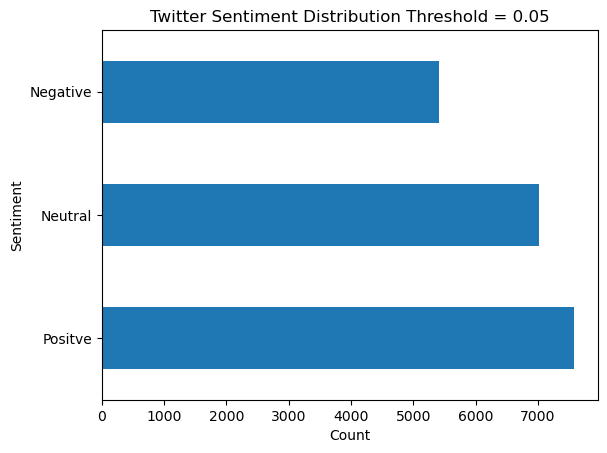

In [9]:
ax = data.sentiment.value_counts().plot(kind='barh')

ax.set_title("Twitter Sentiment Distribution Threshold = 0.05")
ax.set_xlabel("Count")
ax.set_ylabel("Sentiment")

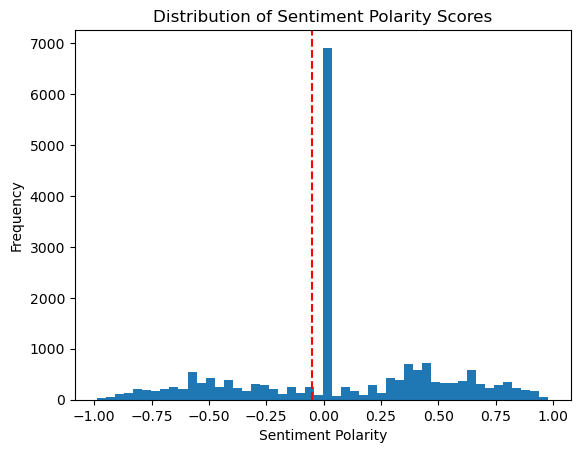

In [10]:
import matplotlib.pyplot as plt

plt.hist(data['polarity'], bins=50)
plt.axvline(-0.05, color='red', linestyle='--')
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Polarity Scores")
plt.show()

In [11]:
data['polarity'].value_counts()

polarity
 0.000    6801
 0.361     566
 0.440     451
 0.637     324
-0.572     301
          ... 
 0.695       1
 0.867       1
 0.894       1
 0.798       1
 0.696       1
Name: count, Length: 927, dtype: int64

In [12]:
zero_posts = data[data['polarity'] == 0.0]

zero_posts[['clean_post']].sample(10)

,clean_post
17666,got back socal im shooting right back bay friday
17458,fucking pumped see thugger coupley beans deep
3209,rt go mn wild cbj underway catch game cbj vs min
17138,start na guyz yong paytforluckysun
18319,userhavertystampa httpstcoawtdigns
7102,happens ivdd surgery httpbitlycvf
9597,fuckwhy would djax back
19326,spray foam coatings inc httpstcommxxdznvn
15611,awh thankyou
6208,rt tiny moments say httptcocvpheni


In [14]:
data['affect_label'] = (data['polarity'] <= -0.05).astype(int)

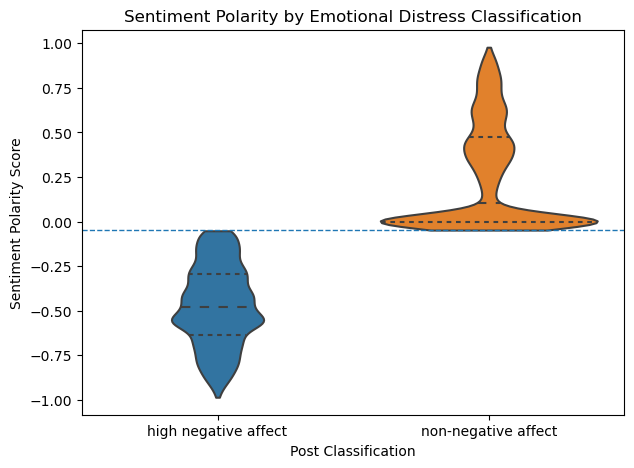

In [16]:
label_map = {0: 'non-negative affect', 1: 'high negative affect'}
data['label_name'] = data['affect_label'].map(label_map)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.violinplot(
    x='label_name',
    y='polarity',
    data=data,
    inner='quartile',
    cut=0
)

plt.axhline(-0.05, linestyle='--', linewidth=1)
plt.xlabel("Post Classification")
plt.ylabel("Sentiment Polarity Score")
plt.title("Sentiment Polarity by Emotional Distress Classification")
plt.show()

In [17]:
data.to_csv('twitter_data_full.csv', index=False)